In [2]:
import numpy as np
import pandas as pd

from keras.layers import Layer, Dense
from keras import initializers
from keras import backend as K
from keras.models import Sequential

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16, 12)

In [3]:
class RBFLayer(Layer):
    def __init__(self, output_dim, normalized=True, **kwargs):
        self.output_dim = output_dim
        self.normalized = normalized
        super(RBFLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        super(RBFLayer, self).build(input_shape)
        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=initializers.RandomUniform(0.0, 1.0),
                                       trainable=True)
        self.bias = self.add_weight(name='bias',
                                    shape=(self.output_dim, ),
                                    initializer=initializers.constant(0.0),
                                    trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.output_dim,),
                                     initializer=initializers.constant(1.0),
                                     trainable=True)

    def call(self, inputs, **kwargs):
        c = K.expand_dims(self.centers, axis=1)
        h = K.transpose(c - inputs)
        res = K.exp(self.bias - self.betas * K.sum(h ** 2, axis=0))
        if self.normalized:
            return res / K.expand_dims(K.sum(res, axis=1), axis=1)
        else:
            return res

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.output_dim

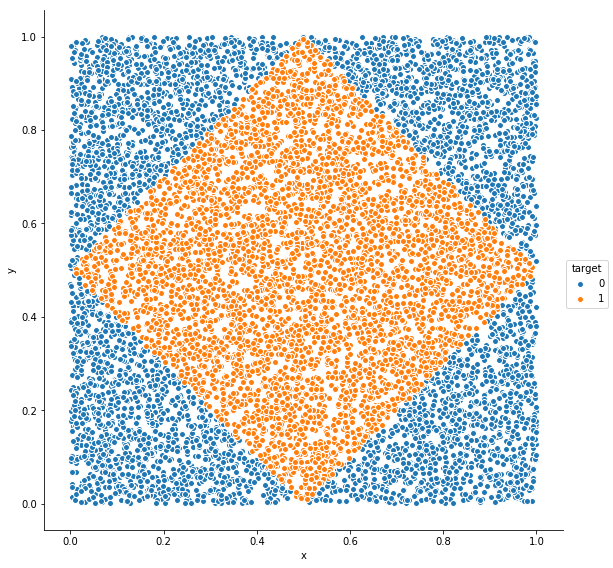

In [4]:
X_train = np.random.rand(10000, 2)
y_train = (np.sum(np.abs(X_train - [0.5, 0.5]), axis=1) < 0.5).astype(int)
data = pd.DataFrame(X_train, columns=["x", "y"])
data["target"] = y_train
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="target", size=8)

**********  RADIAL -- CUADRADO
Epoch 1/25
10000/10000 [==============================] - 3s 272us/step - loss: 0.6922 - acc: 0.5465
Epoch 2/25
10000/10000 [==============================] - 1s 115us/step - loss: 0.6835 - acc: 0.6351
Epoch 3/25
10000/10000 [==============================] - 1s 104us/step - loss: 0.6743 - acc: 0.7159
Epoch 4/25
10000/10000 [==============================] - 1s 96us/step - loss: 0.6631 - acc: 0.7934
Epoch 5/25
10000/10000 [==============================] - 1s 69us/step - loss: 0.6496 - acc: 0.8533
Epoch 6/25
10000/10000 [==============================] - 1s 69us/step - loss: 0.6323 - acc: 0.8889
Epoch 7/25
10000/10000 [==============================] - 1s 89us/step - loss: 0.6119 - acc: 0.9014
Epoch 8/25
10000/10000 [==============================] - 1s 71us/step - loss: 0.5887 - acc: 0.9020
Epoch 9/25
10000/10000 [==============================] - 1s 73us/step - loss: 0.5618 - acc: 0.9010
Epoch 10/25
10000/10000 [==============================] - 1s 87us

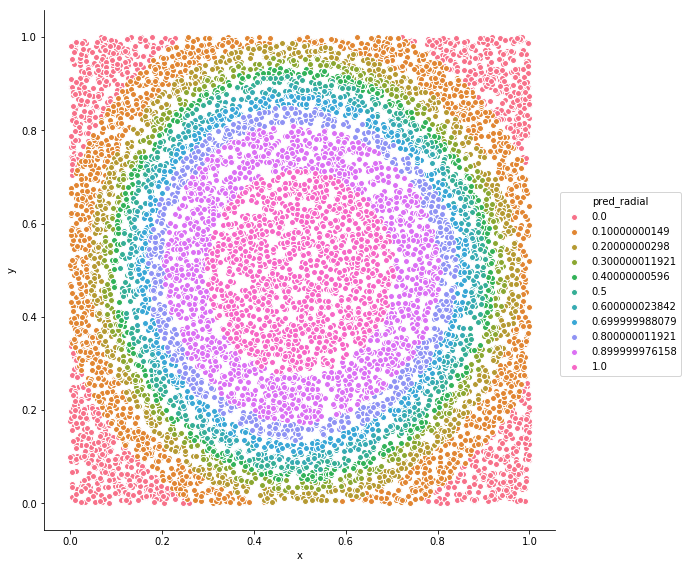

In [5]:
radial_model = Sequential([
    RBFLayer(5, input_shape=(2,)),
    Dense(1, activation="sigmoid")
])

radial_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

print("*" * 10, " RADIAL -- CUADRADO")
radial_model.fit(X_train, y_train, epochs=25)
data["pred_radial"] = radial_model.predict(X_train).round(1)
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="pred_radial", size=8)

In [9]:
radial_model.layers[0].get_weights()

[array([[ 0.44890976,  0.49393928],
        [ 0.92626363,  0.57276851],
        [ 1.21574914, -0.28625992],
        [ 0.44516581,  0.49355051],
        [ 0.18473189,  0.14295484]], dtype=float32),
 array([ 1.31194508, -1.04845393,  1.39030516,  0.83489865, -1.41405654], dtype=float32),
 array([ 6.96917248, -3.26597071,  3.60504508,  6.9624753 , -2.44251466], dtype=float32)]

In [10]:
radial_model.layers[1].get_weights()

[array([[ 5.61017418],
        [-4.29315996],
        [-4.41798735],
        [ 5.40222931],
        [-4.12146282]], dtype=float32), array([-0.18468373], dtype=float32)]

**********  MLP 1-- CUADRADO
Epoch 1/25
10000/10000 [==============================] - 2s 163us/step - loss: 0.6977 - acc: 0.5003
Epoch 2/25
10000/10000 [==============================] - 2s 159us/step - loss: 0.6899 - acc: 0.5381
Epoch 3/25
10000/10000 [==============================] - 1s 140us/step - loss: 0.6776 - acc: 0.5839
Epoch 4/25
10000/10000 [==============================] - 1s 138us/step - loss: 0.6643 - acc: 0.6139
Epoch 5/25
10000/10000 [==============================] - 1s 144us/step - loss: 0.6546 - acc: 0.6352
Epoch 6/25
10000/10000 [==============================] - 2s 162us/step - loss: 0.6447 - acc: 0.6501
Epoch 7/25
10000/10000 [==============================] - 2s 160us/step - loss: 0.6346 - acc: 0.6681
Epoch 8/25
10000/10000 [==============================] - 1s 110us/step - loss: 0.6241 - acc: 0.6783
Epoch 9/25
10000/10000 [==============================] - 1s 74us/step - loss: 0.6131 - acc: 0.6922
Epoch 10/25
10000/10000 [==============================] - 1s 7

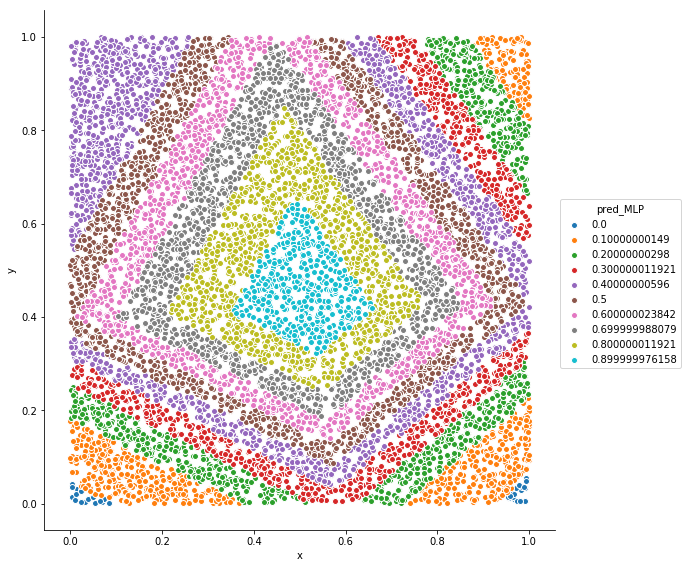

In [11]:
MLP_model = Sequential([
    Dense(5, input_shape=(2,), activation="relu"),
    Dense(1, activation="sigmoid")
])

MLP_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

print("*" * 10, " MLP 1-- CUADRADO")
MLP_model.fit(X_train, y_train, epochs=25)
data["pred_MLP"] = MLP_model.predict(X_train).round(1)
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="pred_MLP", size=8)

**********  MLP 2-- CUADRADO
Epoch 1/25
10000/10000 [==============================] - 3s 312us/step - loss: 0.6822 - acc: 0.5615
Epoch 2/25
10000/10000 [==============================] - 1s 120us/step - loss: 0.6581 - acc: 0.6694
Epoch 3/25
10000/10000 [==============================] - 1s 90us/step - loss: 0.6287 - acc: 0.7038
Epoch 4/25
10000/10000 [==============================] - 1s 92us/step - loss: 0.5950 - acc: 0.7392
Epoch 5/25
10000/10000 [==============================] - 1s 91us/step - loss: 0.5614 - acc: 0.7682
Epoch 6/25
10000/10000 [==============================] - 1s 84us/step - loss: 0.5297 - acc: 0.7830
Epoch 7/25
10000/10000 [==============================] - 1s 88us/step - loss: 0.4997 - acc: 0.8026
Epoch 8/25
10000/10000 [==============================] - 1s 81us/step - loss: 0.4719 - acc: 0.8177
Epoch 9/25
10000/10000 [==============================] - 1s 82us/step - loss: 0.4456 - acc: 0.8315
Epoch 10/25
10000/10000 [==============================] - 1s 82us/st

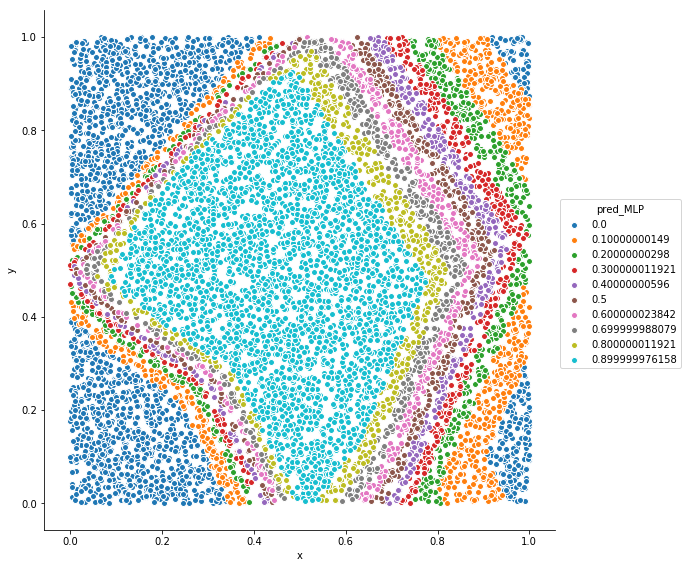

In [12]:
MLP_model = Sequential([
    Dense(10, input_shape=(2,), activation="relu"),
    Dense(5, activation="relu"),
    Dense(1, activation="sigmoid")
])

MLP_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

print("*" * 10, " MLP 2-- CUADRADO")
MLP_model.fit(X_train, y_train, epochs=25)
data["pred_MLP"] = MLP_model.predict(X_train).round(1)
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="pred_MLP", size=8)

In [13]:
data.columns

Index(['x', 'y', 'target', 'pred_radial', 'pred_MLP'], dtype='object')

In [18]:
from sklearn.metrics import roc_auc_score

for c in ['pred_radial', 'pred_MLP']:
    print(c, roc_auc_score(data.target, data[c]))

pred_radial 0.994654009237
pred_MLP 0.99467511555


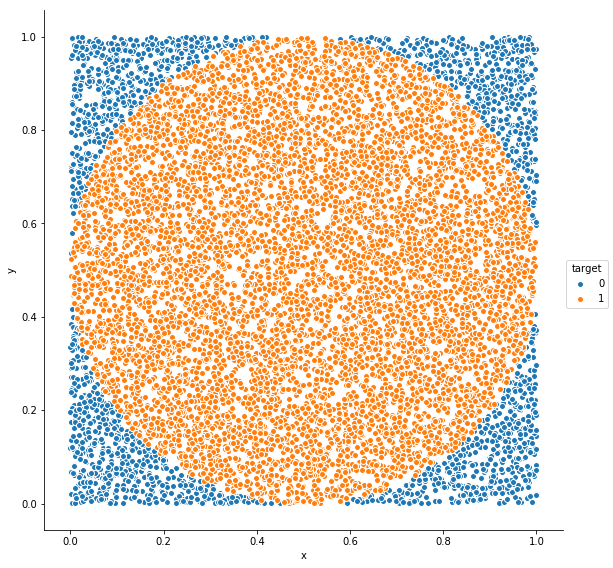

In [15]:
X_train = np.random.rand(10000, 2)
y_train = (np.power(np.sum(np.power(X_train - [0.5, 0.5], 2), axis=1), 0.5) < 0.5).astype(int)
data = pd.DataFrame(X_train, columns=["x", "y"])
data["target"] = y_train
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="target", size=8)

**********  RADIAL -- REDONDO
Epoch 1/50
10000/10000 [==============================] - 3s 276us/step - loss: 0.5442 - acc: 0.7831
Epoch 2/50
10000/10000 [==============================] - ETA: 0s - loss: 0.5208 - acc: 0.783 - 2s 171us/step - loss: 0.5209 - acc: 0.7831
Epoch 3/50
10000/10000 [==============================] - 2s 186us/step - loss: 0.5169 - acc: 0.7831
Epoch 4/50
10000/10000 [==============================] - 1s 138us/step - loss: 0.5126 - acc: 0.7831
Epoch 5/50
10000/10000 [==============================] - 1s 138us/step - loss: 0.5068 - acc: 0.7831
Epoch 6/50
10000/10000 [==============================] - 1s 82us/step - loss: 0.4995 - acc: 0.7831
Epoch 7/50
10000/10000 [==============================] - 1s 92us/step - loss: 0.4908 - acc: 0.7831
Epoch 8/50
10000/10000 [==============================] - 1s 65us/step - loss: 0.4804 - acc: 0.7831
Epoch 9/50
10000/10000 [==============================] - 1s 65us/step - loss: 0.4682 - acc: 0.7831
Epoch 10/50
10000/10000 [==

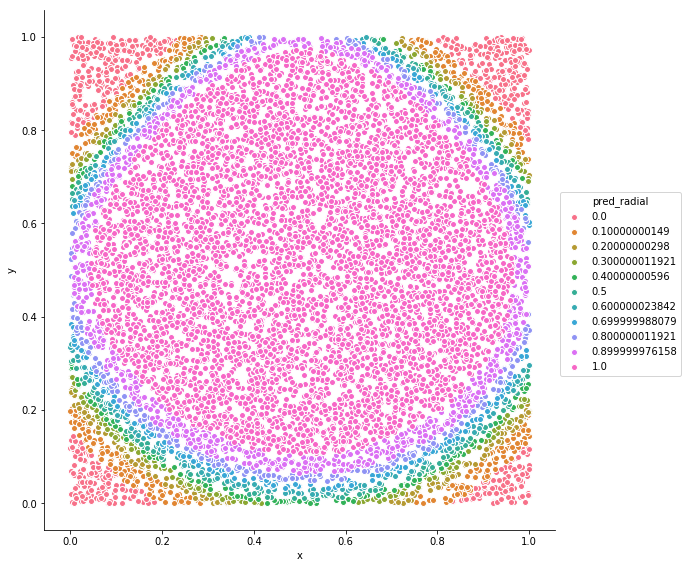

In [16]:
radial_model = Sequential([
    RBFLayer(5, input_shape=(2,)),
    Dense(1, activation="sigmoid")
])

radial_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

print("*" * 10, " RADIAL -- REDONDO")
radial_model.fit(X_train, y_train, epochs=50)
data["pred_radial"] = radial_model.predict(X_train).round(1)
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="pred_radial", size=8)

**********  MLP 2 -- REDONDO
Epoch 1/50
10000/10000 [==============================] - 2s 201us/step - loss: 0.5408 - acc: 0.7831
Epoch 2/50
10000/10000 [==============================] - 1s 140us/step - loss: 0.5200 - acc: 0.7831
Epoch 3/50
10000/10000 [==============================] - 1s 137us/step - loss: 0.5068 - acc: 0.7831
Epoch 4/50
10000/10000 [==============================] - 1s 144us/step - loss: 0.4889 - acc: 0.7831
Epoch 5/50
10000/10000 [==============================] - 1s 139us/step - loss: 0.4661 - acc: 0.7831
Epoch 6/50
10000/10000 [==============================] - 1s 138us/step - loss: 0.4379 - acc: 0.7831
Epoch 7/50
10000/10000 [==============================] - 1s 140us/step - loss: 0.4071 - acc: 0.7857
Epoch 8/50
10000/10000 [==============================] - 2s 176us/step - loss: 0.3740 - acc: 0.8117
Epoch 9/50
10000/10000 [==============================] - 1s 112us/step - loss: 0.3413 - acc: 0.8389
Epoch 10/50
10000/10000 [==============================] - 1s 

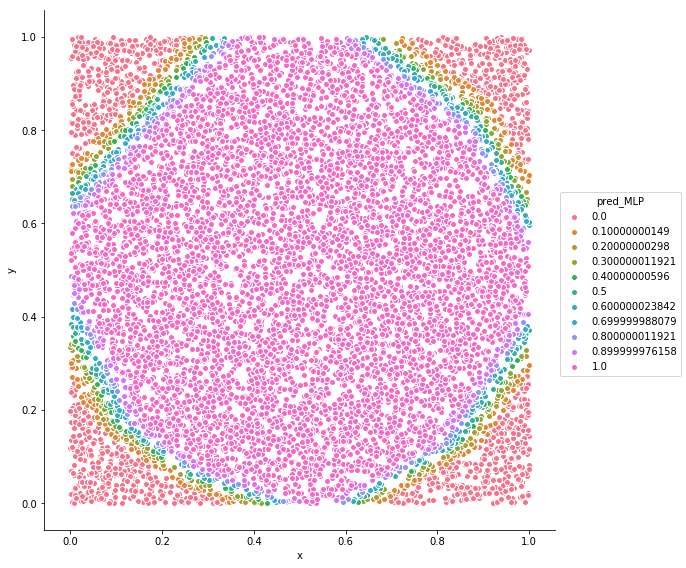

In [17]:
MLP_model = Sequential([
    Dense(10, input_shape=(2,), activation="relu"),
    Dense(5, activation="relu"),
    Dense(1, activation="sigmoid")
])

MLP_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

print("*" * 10, " MLP 2 -- REDONDO")
MLP_model.fit(X_train, y_train, epochs=50)
data["pred_MLP"] = MLP_model.predict(X_train).round(1)
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="pred_MLP", size=8)

**********  ENSAMBLE -- REDONDO
Epoch 1/50
10000/10000 [==============================] - 4s 379us/step - loss: 0.5440 - acc: 0.7831
Epoch 2/50
10000/10000 [==============================] - 2s 171us/step - loss: 0.5116 - acc: 0.7831
Epoch 3/50
10000/10000 [==============================] - 1s 127us/step - loss: 0.4991 - acc: 0.7831
Epoch 4/50
10000/10000 [==============================] - 1s 135us/step - loss: 0.4822 - acc: 0.7835
Epoch 5/50
10000/10000 [==============================] - 1s 127us/step - loss: 0.4607 - acc: 0.7904
Epoch 6/50
10000/10000 [==============================] - 1s 131us/step - loss: 0.4372 - acc: 0.8015
Epoch 7/50
10000/10000 [==============================] - 1s 129us/step - loss: 0.4141 - acc: 0.8068
Epoch 8/50
10000/10000 [==============================] - 1s 129us/step - loss: 0.3920 - acc: 0.8114
Epoch 9/50
10000/10000 [==============================] - 1s 128us/step - loss: 0.3710 - acc: 0.8227
Epoch 10/50
10000/10000 [==============================] - 

[array([[-2.11379337],
        [-3.15669227],
        [-1.81690621],
        [ 6.08261824],
        [-5.57227278],
        [-0.36333093],
        [ 1.39474344],
        [-5.56483364],
        [ 1.68347323],
        [ 2.25351024]], dtype=float32), array([ 0.04246262], dtype=float32)]

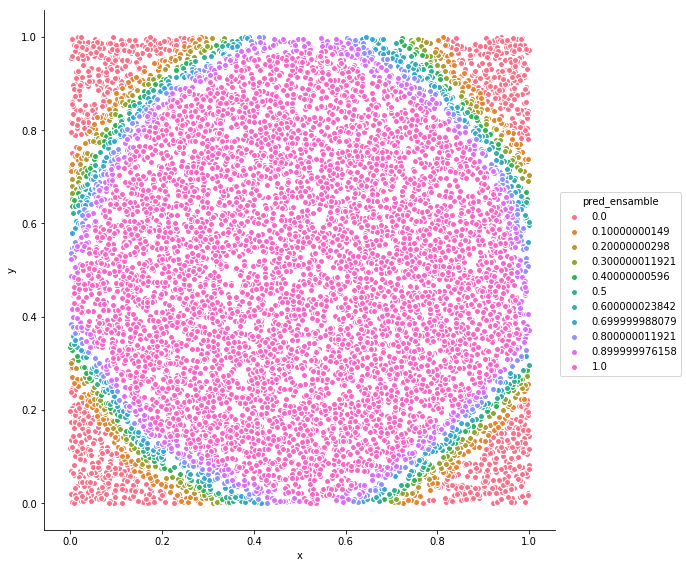

In [19]:
from keras.layers import Input, concatenate
from keras.models import Model

input1 = Input(shape=(2, ))
dense1 = RBFLayer(5)(input1)
input2 = Input(shape=(2, ))
dense2 = Dense(10, activation='relu')(input2)
dense2 = Dense(5, activation='relu')(dense2)
merged = concatenate([dense1, dense2])
out = Dense(1, activation='sigmoid', name='output_layer')(merged)
ensamble = Model(inputs = [input1, input2], outputs = [out])
ensamble.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
print("*" * 10, " ENSAMBLE -- REDONDO")
ensamble.fit([X_train, X_train], y_train, epochs=50)
data["pred_ensamble"] = ensamble.predict([X_train, X_train]).round(1)
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="pred_ensamble", size=8)
ensamble.layers[-1].get_weights()

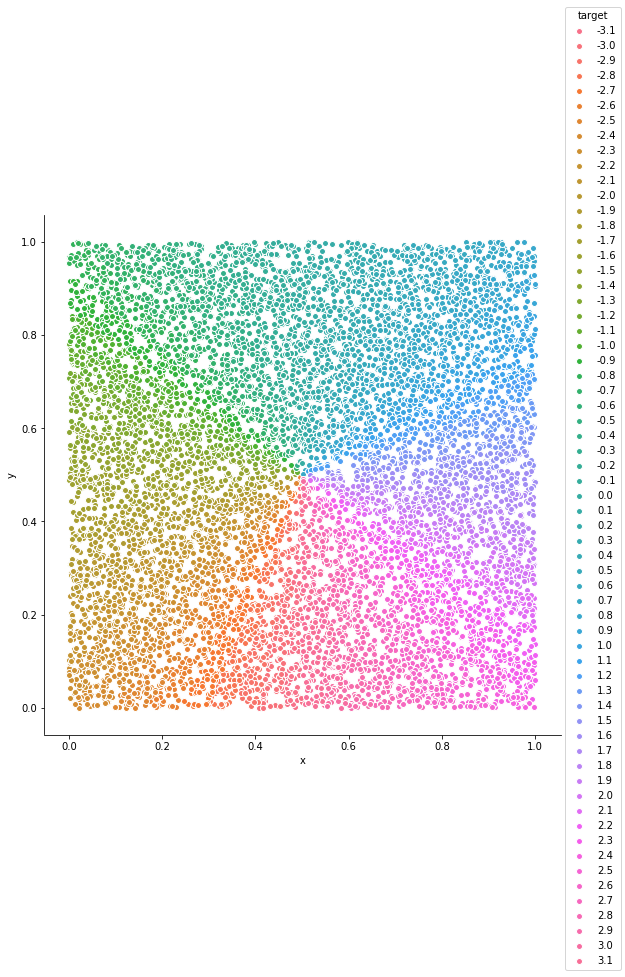

In [12]:
X_train = np.random.rand(10000, 2)
y_train = np.arctan2(X_train[:, 0] - 0.5, X_train[:, 1] - 0.5)
data = pd.DataFrame(X_train, columns=["x", "y"])
data["target"] = y_train.round(1)
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="target", size=8)